In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [49]:
header_rating = ['userId', 'movieId', 'rating', 'timestamp' ]
df_ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names=header_rating)


u_unique = df_ratings.userId.unique()
user2Idx = {o:i+1 for i,o in enumerate(u_unique)}

m_unique = df_ratings.movieId.unique()
movie2Idx = {o:i+1 for i,o in enumerate(m_unique)}
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
print(len(u_unique))
print(len(m_unique))

943
1682


In [6]:
df_users = pd.read_csv('./ml-100k/u.user', sep='|',  names=['id', 'age', 'ocupation', 'x'], encoding='latin-1')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         943 non-null    int64 
 1   age        943 non-null    object
 2   ocupation  943 non-null    object
 3   x          943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [44]:
len(movie2Idx)

1682

In [90]:
idx2Movie = {v:k for k,v in movie2Idx.items()}
idx2Movie

{1: 242,
 2: 302,
 3: 377,
 4: 51,
 5: 346,
 6: 474,
 7: 265,
 8: 465,
 9: 451,
 10: 86,
 11: 257,
 12: 1014,
 13: 222,
 14: 40,
 15: 29,
 16: 785,
 17: 387,
 18: 274,
 19: 1042,
 20: 1184,
 21: 392,
 22: 486,
 23: 144,
 24: 118,
 25: 1,
 26: 546,
 27: 95,
 28: 768,
 29: 277,
 30: 234,
 31: 246,
 32: 98,
 33: 193,
 34: 88,
 35: 194,
 36: 1081,
 37: 603,
 38: 796,
 39: 32,
 40: 16,
 41: 304,
 42: 979,
 43: 564,
 44: 327,
 45: 201,
 46: 1137,
 47: 241,
 48: 4,
 49: 332,
 50: 100,
 51: 432,
 52: 322,
 53: 181,
 54: 196,
 55: 679,
 56: 384,
 57: 143,
 58: 423,
 59: 515,
 60: 20,
 61: 288,
 62: 219,
 63: 526,
 64: 919,
 65: 26,
 66: 232,
 67: 427,
 68: 512,
 69: 15,
 70: 1049,
 71: 416,
 72: 165,
 73: 690,
 74: 248,
 75: 1444,
 76: 5,
 77: 229,
 78: 237,
 79: 480,
 80: 54,
 81: 366,
 82: 518,
 83: 403,
 84: 111,
 85: 625,
 86: 338,
 87: 25,
 88: 1016,
 89: 154,
 90: 275,
 91: 1153,
 92: 498,
 93: 382,
 94: 209,
 95: 23,
 96: 294,
 97: 208,
 98: 685,
 99: 328,
 100: 496,
 101: 132,
 102: 174

In [48]:
header_movie = ['movieId', 'movieTitle', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
df_movies = pd.read_csv('./ml-100k/u.item', sep='|', encoding = "ISO-8859-1", names=header_movie)
df_movies

,movieId,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

ratings = join_df(df_ratings, df_movies, "movieId", "movieId")
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100000 non-null  int64  
 1   movieId             100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   movieTitle          100000 non-null  object 
 5   release date        99991 non-null   object 
 6   video release date  0 non-null       float64
 7   IMDb URL            99987 non-null   object 
 8   unknown             100000 non-null  int64  
 9   Action              100000 non-null  int64  
 10  Adventure           100000 non-null  int64  
 11  Animation           100000 non-null  int64  
 12  Children's          100000 non-null  int64  
 13  Comedy              100000 non-null  int64  
 14  Crime               100000 non-null  int64  
 15  Documentary         100000 non-null

In [50]:
ratings.query('movieId == 42')

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3628,317,42,2,0.994980,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
6856,349,42,2,0.997999,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
9660,288,42,3,0.999579,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
10323,132,42,1,0.984550,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
11197,53,42,3,0.987811,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
11900,59,42,4,0.989750,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
12284,373,42,4,0.985715,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
13546,264,42,5,0.979880,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
17937,291,42,4,0.995280,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0
19235,164,42,4,0.980241,Last Action Hero (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Last%20Action...,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
ratings.userId = ratings.userId.apply(lambda x: user2Idx[x])
ratings.movieId = ratings.movieId.apply(lambda x: movie2Idx[x])

In [53]:
ratings

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,3,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,5,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,876,174,3,880175444,"First Wives Club, The (1996)",14-Sep-1996,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,709,248,5,879795543,Back to the Future (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,38,1005,1,874795795,Sliver (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,0,1,0,0
99998,59,444,2,882399156,101 Dalmatians (1996),27-Nov-1996,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
ratings['timestamp'] = ratings['timestamp']/max(ratings['timestamp'])
ratings

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,3,0.986527,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0.998244,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,3,1,0.983880,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,0.985806,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,5,1,0.992288,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,876,174,3,0.985323,"First Wives Club, The (1996)",14-Sep-1996,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,709,248,5,0.984897,Back to the Future (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,38,1005,1,0.979300,Sliver (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,0,1,0,0
99998,59,444,2,0.987812,101 Dalmatians (1996),27-Nov-1996,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
ratings_train, ratings_val = train_test_split(ratings, test_size=0.2)
len(ratings_train), len(ratings_val)

(80000, 20000)

In [56]:
n_split = 20000
ratings_train = ratings[n_split:]
ratings_val = ratings[:n_split]
len(ratings_train), len(ratings_val)

(80000, 20000)

In [57]:
n_users = int(ratings.userId.nunique())
n_movies = int(ratings.movieId.nunique())
n_users_train = int(ratings_train.userId.nunique())
n_movies_train = int(ratings_train.movieId.nunique())
print(n_users, n_movies, n_users_train, n_movies_train)

943 1682 943 1650


In [58]:
max_rating = ratings_train['rating'].max()
min_rating = ratings_train['rating'].min()
av_rating = ratings_train['rating'].mean()
max_rating, min_rating, av_rating

(5, 1, 3.52835)

In [59]:
from keras.layers import Input, Embedding, Flatten, Dropout, Concatenate, Dense, Activation, Lambda
from keras import Model
from keras.regularizers import l2
from keras.optimizers import Adam

In [63]:
# Diferencia: las dimensiones de los Latent factors pueden ser distintos
n_latent_factors_user = 6
n_latent_factors_movie = 6

In [64]:
genre = ['Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']

In [66]:
genre_input = Input(shape=[len(genre)],name='genre')
timestamp_input = Input(shape=[1],name='timestamp')

# Embedding de la pelicula
movie_input = Input(shape=[1],name='Item')
movie_embedding = Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding', embeddings_regularizer = l2(0.001))(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)
# movie_vec = Dropout(0.2)(movie_vec)


#Embedding del usuario
user_input = Input(shape=[1],name='User')
user_vec = Flatten(name='FlattenUsers')(Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding', embeddings_regularizer = l2(0.001))(user_input))
# user_vec = Dropout(0.2)(user_vec)


concat = Concatenate(name='Concat')([
    movie_vec, user_vec, timestamp_input, genre_input
])
# concat = Dropout(0.2)(concat)

x = Dense(50,name='FullyConnected-1', activation='relu', kernel_regularizer=l2(0.001))(concat)
#x = Dropout(0.5)(x)
#x = Dense(50,name='FullyConnected-1', activation='relu')(concat)
#x = Dropout(0.5)(x)


## Se pueden sacar las siguientes dos lineas para no forzar a sigmoidea
x = Dense(1, activation='sigmoid',name='Activation')(x)
x = Lambda(lambda z: (max_rating - min_rating) * z + min_rating)(x)
##

model = Model([user_input, movie_input, timestamp_input, genre_input], x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Item (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 User (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 Movie-Embedding (Embedding  (None, 1, 6)                 10098     ['Item[0][0]']                
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 6)                 5664      ['User[0][0]']          

In [67]:
from fnn_helper import PlotLosses
plot_losses = PlotLosses(1, None)

In [68]:
import keras.backend as K 
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [69]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'mean_squared_error', metrics=[root_mean_squared_error])

In [70]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, monitor='val_root_mean_squared_error')

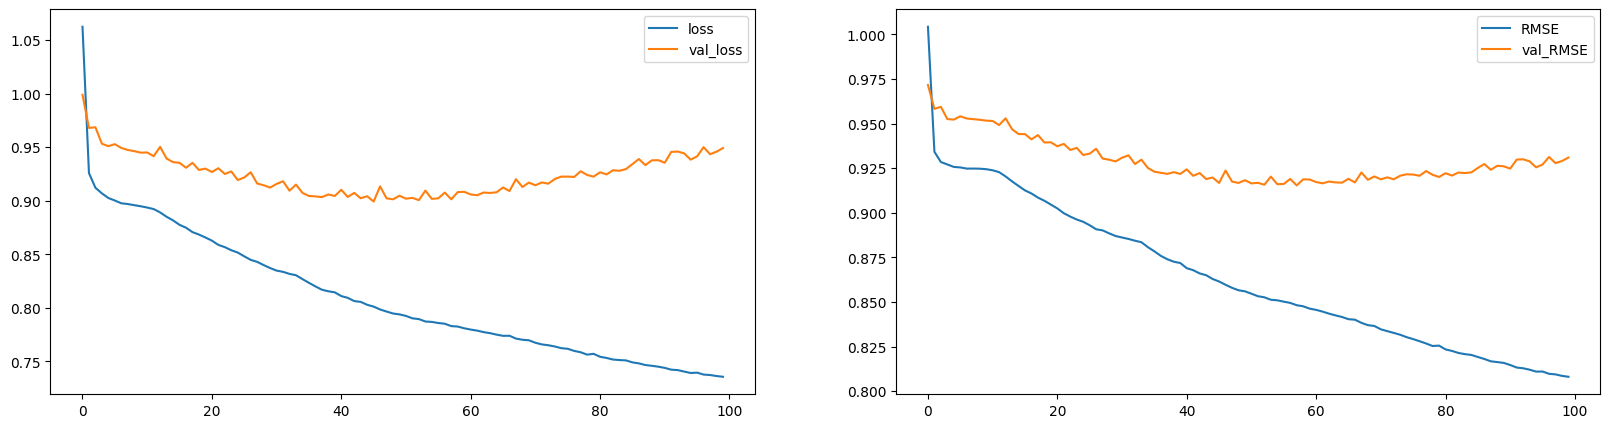


Epoch 100: val_root_mean_squared_error did not improve from 0.91533
500/500 - 1s - loss: 0.7357 - root_mean_squared_error: 0.8081 - val_loss: 0.9492 - val_root_mean_squared_error: 0.9309 - 907ms/epoch - 2ms/step


In [71]:
history = model.fit([ratings_train.userId, ratings_train.movieId, ratings_train.timestamp, ratings_train[genre]], 
                    ratings_train.rating, 
                    validation_data=([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating), 
                    batch_size = 160,
                    callbacks = [plot_losses, checkpointer],
                    epochs=100, verbose=2)

In [72]:
model.evaluate([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.9492 - root_mean_squared_error: 0.9231


[0.9492075443267822, 0.9230793714523315]

In [74]:
ratings_val

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,3,0.986527,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0.998244,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,3,1,0.983880,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,0.985806,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,5,1,0.992288,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,176,820,3,0.979475,Paradise Lost: The Child Murders at Robin Hood...,06-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Paradise%20Lo...,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,119,857,5,0.981648,Cinema Paradiso (1988),01-Jan-1988,NaN,http://us.imdb.com/M/title-exact?Nuovo%20cinem...,0,0,...,0,0,0,0,0,1,0,0,0,0
19997,432,292,5,0.993825,While You Were Sleeping (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?While%20You%2...,0,0,...,0,0,0,0,0,1,0,0,0,0
19998,378,700,5,0.984501,8 1/2 (1963),01-Jan-1963,NaN,http://us.imdb.com/M/title-exact?8%201/2%20(1963),0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
model.load_weights('weights.hdf5')
model.evaluate([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.9013 - root_mean_squared_error: 0.9081


[0.9013227820396423, 0.9081241488456726]

# Embeddings

In [84]:
movie_embeddings_layer = model.layers[2]
user_embeddings_layer = model.layers[3]


array([-4.9493121e-33, -2.4724055e-33,  2.0155019e-33,  4.2865342e-33,
       -5.6457524e-34,  3.6744366e-33], dtype=float32)

In [77]:
movie_embeddings_layer.name, user_embeddings_layer.name

('Movie-Embedding', 'User-Embedding')

In [85]:
movie_embeddings_matrix = movie_embeddings_layer.get_weights()[0]
user_embeddings_matrix = user_embeddings_layer.get_weights()[0]

print(type(movie_embeddings_matrix[0]))
#type(user_embeddings_matrix)
movie_embeddings_matrix.shape, user_embeddings_matrix.shape

<class 'numpy.ndarray'>


((1683, 6), (944, 6))

In [87]:
model_test_emb = Model([movie_input], [movie_embedding])
model_test_emb


In [91]:
index = 424 #6
movie_embed = model_test_emb.predict([index])
df_movies.loc[idx2Movie[index]].movieTitle

1/1 [==============================] - 0s 30ms/step


'Lion King, The (1994)'

In [92]:
from sklearn.neighbors import NearestNeighbors

In [93]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(movie_embeddings_matrix)

In [94]:
neighbors = nbrs.kneighbors([movie_embeddings_matrix[index]])

In [95]:
neighbors

(array([[0.        , 0.02915931, 0.04498655, 0.04865134, 0.04966509,
         0.05047023, 0.05173725, 0.05477035, 0.05879009, 0.06506979]],
       dtype=float32),
 array([[ 424,  503,  650, 1374,  713,  233,  547, 1038,    1,   10]],
       dtype=int64))

In [98]:
for idx in neighbors[1][0]:
    print(df_movies.loc[idx2Movie[idx]].movieTitle)

Lion King, The (1994)
Richard III (1995)
Day the Earth Stood Still, The (1951)
Specialist, The (1994)
Canadian Bacon (1994)
Bananas (1971)
Wizard of Oz, The (1939)
Fear of a Black Hat (1993)
Jungle2Jungle (1997)
Searching for Bobby Fischer (1993)
